In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pywaffle import Waffle
from wordcloud import WordCloud,STOPWORDS
import requests
import networkx as nx
import folium
import re

In [2]:
df=pd.read_csv('supermarket_sales.csv')

In [3]:
# display 5 row
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# describe categorical data
df.describe(exclude=np.number)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,530-90-9855,A,Yangon,Member,Female,Fashion accessories,02-07-2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [8]:
# basic info
df.info()
# and how many value are available in dataset
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df=df.fillna(df.mean())

In [10]:

df[df['Customer type']=='Member']['Total'].sum()

164223.44400000002

In [11]:
df[df['Customer type']=='Normal']['Total'].sum()

158743.305

In [12]:
# 1. 4
# 2. 6
# 3. Q1 for bottom box Q2 for middle box Q3 for upper box ll lower line ul upper line
# 4. error
# 5. 0
# 6. ['ABC123XYZ']
# 7. [] because hello world is not in hello
# 8. df[0] gives column value not row ans=1
# 9. 
# 10. 

In [13]:
# thresh = 3 means minimum 3 data should be visible rather then null
# axis =1 means if atleast 1 null then remove that column
# inplace = true means to update the data
# list thi create karu daTAFRAME toh row ave otherwise column

In [24]:
df=pd.DataFrame([[1,2,3,4,5],[2,1,3,4,5],[np.nan,np.nan,np.nan,np.nan,np.nan]])
df.drop(1,inplace=True)
df=df.dropna()
print(df)
print(df[0].shape[1])

     0    1    2    3    4
0  1.0  2.0  3.0  4.0  5.0


IndexError: tuple index out of range

In [17]:
df=pd.DataFrame([[1,2,3,4,5],[2,1,3,4,5],[np.nan,np.nan,np.nan,np.nan,np.nan]])
df.drop(1,inplace=True)
df=df.dropna()
print(df[0].shape[0])

1


In [33]:
df=pd.DataFrame([[1,2,3,4,5],[2,1,3,4,5],[np.nan,np.nan,np.nan,np.nan,np.nan]])
df.drop(1)
print(df)
df=df.dropna()
print(df[0])
# print(df[0].shape[0])

     0    1    2    3    4
0  1.0  2.0  3.0  4.0  5.0
1  2.0  1.0  3.0  4.0  5.0
2  NaN  NaN  NaN  NaN  NaN
0    1.0
1    2.0
Name: 0, dtype: float64


In [35]:
text="Hello, how are you?"
pattern=r'\w{3}\W+'
result=re.sub(pattern,"###",text)
result

'He############'

In [36]:
text="Hello, how are you?"
pattern=r'\w{3}\W'
result=re.sub(pattern,"###",text)
result

'He### #########'

In [37]:
text="Hello, how are you?"
pattern=r'\w{3}'
result=re.sub(pattern,"###",text)
result

'###lo, ### ### ###?'

In [39]:
df=pd.read_csv('train.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df=df.dropna()

In [47]:
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,183,183,183,183,183
unique,183,2,127,133,3
top,"Minahan, Dr. William Edward",male,113760,G6,S
freq,1,95,4,4,116


<AxesSubplot:>

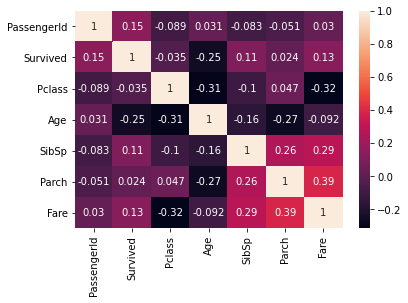

In [48]:
sns.heatmap(data=df.corr(),annot=True)

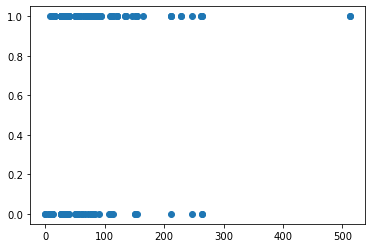

In [51]:
plt.scatter(df.Fare,df.Survived)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

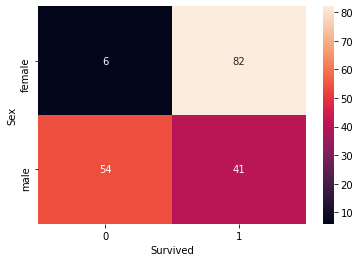

In [53]:
sns.heatmap(data=pd.crosstab(df.Sex,df.Survived),annot=True)

<AxesSubplot:>

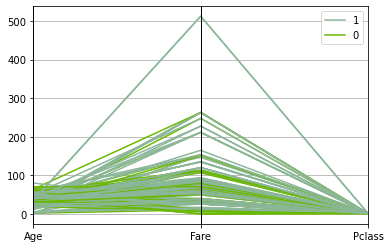

In [54]:
pd.plotting.parallel_coordinates(df,'Survived',cols=['Age','Fare','Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

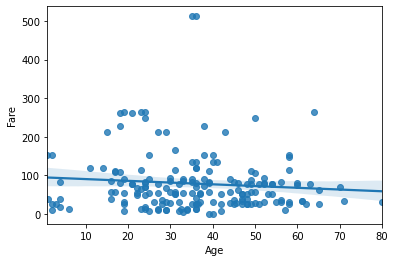

In [55]:
sns.regplot(x=df.Age,y=df.Fare)

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

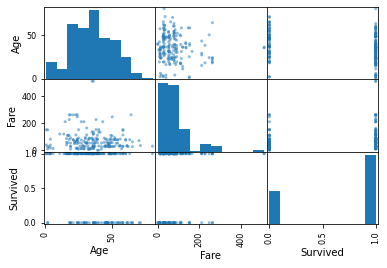

In [59]:
pd.plotting.scatter_matrix(df[['Age','Fare','Survived']])

In [61]:
pd.crosstab(df.Sex,df.Survived,margins=True,normalize=True)

Survived,0,1,All
Sex,,,
female,0.032787,0.448087,0.480874
male,0.295082,0.224044,0.519126
All,0.327869,0.672131,1.000000


In [64]:
x=df[df.Sex=='male'].shape[0]
print(x)

95


In [66]:
y=df[(df.Sex=='male')&(df.Survived==1)].shape[0]
print(y)

41


In [67]:
y/x

0.43157894736842106

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


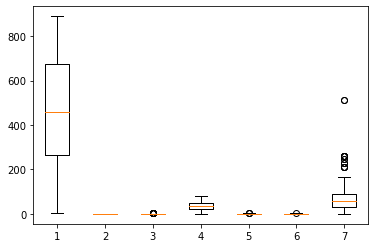

In [70]:
plt.boxplot(df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']])
plt.show()

In [71]:
q1=df['Fare'].quantile(0.25)
q2=df['Fare'].quantile(0.75)
IQR=q2-q1
UL=q2+1.5*IQR
LL=q1+1.5*IQR
df=df[(df['Fare']>=LL) & (df['Fare']<=UL) ] 

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb0388faf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb0389c1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb0388f790>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb0389c8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb0389cc10>],
 'means': []}

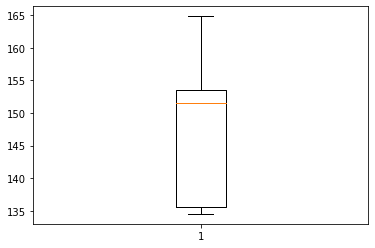

In [72]:
plt.boxplot(df.Fare)

In [79]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.00,0,2,36928,164.8667,C7,S
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.00,1,1,16966,134.5000,E34,C
325,326,1,1,"Young, Miss. Marie Grice",female,36.00,0,0,PC 17760,135.6333,C32,C
332,333,0,1,"Graham, Mr. George Edward",male,38.00,0,1,PC 17582,153.4625,C91,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.00,0,0,16966,134.5000,E40,C


In [86]:
# 15
l=[]
for i in df.Age:
    if i<18:
        l.append('children')
    elif i<30:
        l.append('adults')
    elif i<50:
        l.append('Young adults')
    elif i<100:
        l.append('senior')
df.Agegroup=np.array(l)
# df.Agegroup=pd.cut(df.Age,bins=[0,18,30,50,100],labels=[('c','a','ya','s')])


In [87]:
df.Agegroup

array(['senior', 'senior', 'Young adults', 'children', 'children',
       'Young adults', 'Young adults', 'Young adults', 'Young adults',
       'Young adults', 'adults', 'Young adults'], dtype='<U12')

In [ ]:
pd.cros

In [78]:
# 16
df[df.Pclass==1]["Fare"].sum()
# or
df[df['Pclass']==1]["Fare"].sum()

1766.6916

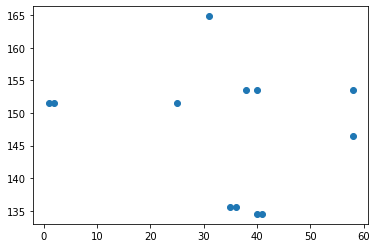

In [74]:
plt.scatter(df.Age,df.Fare)

In [ ]:
# 10 mcq
# 5 marks panda
# 5 marks regex
# # 6 marks
# networkx
# pywaffle
# wordcloud
# fill_between
# stackplot
# # 9 marks
# paper